<a href="https://colab.research.google.com/github/messias077/REP/blob/main/Problema_Classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Intercept.....: [ 6.58581123 -3.05395377 -1.50574649  2.56364014  0.90279785 -1.85869422
 -3.63385474]
Erro inicial..: 0.3759124944252752
Classes.......: [1 2 3 4 5 6 7] 



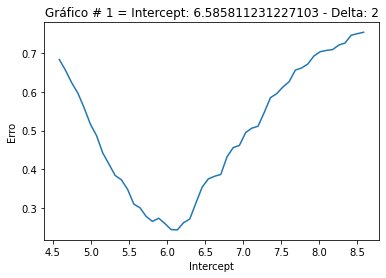

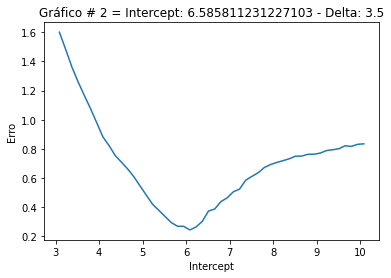

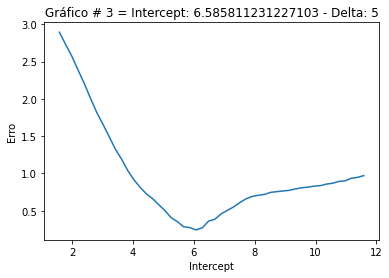

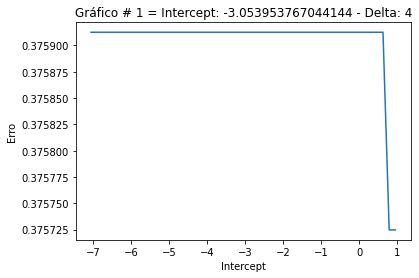

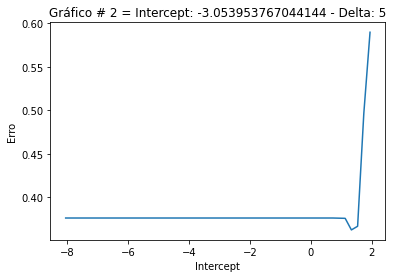

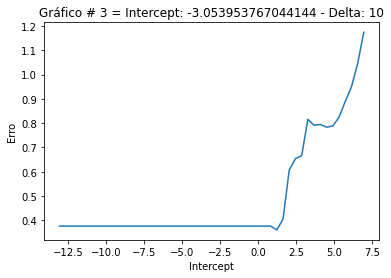

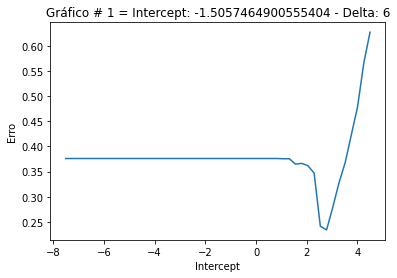

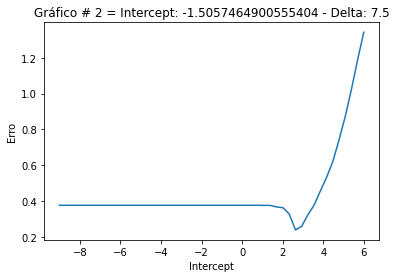

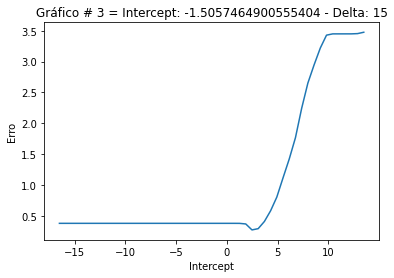

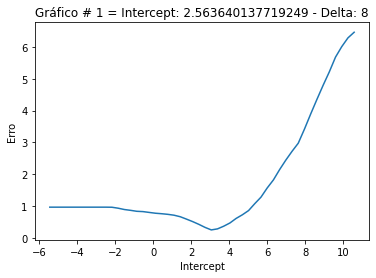

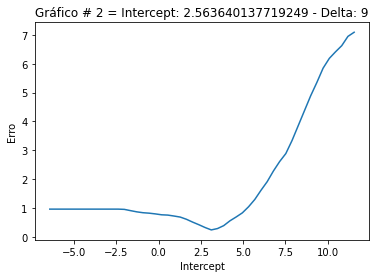

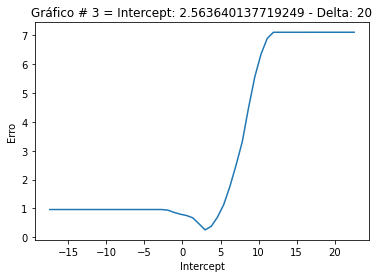

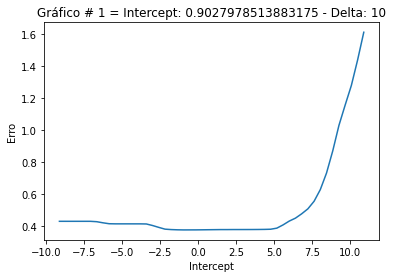

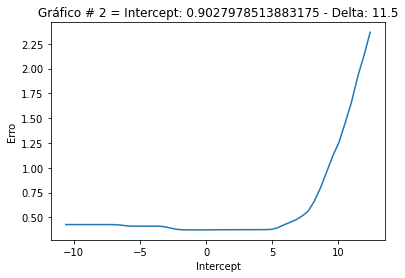

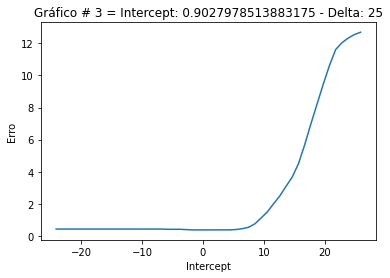

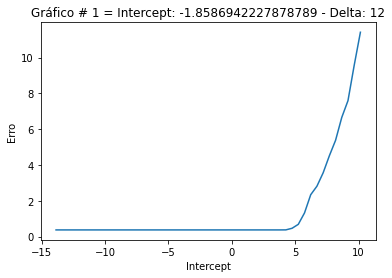

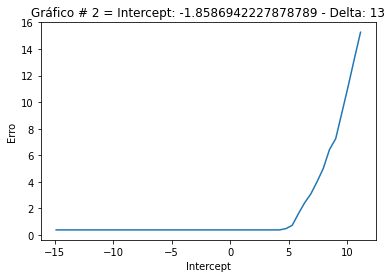

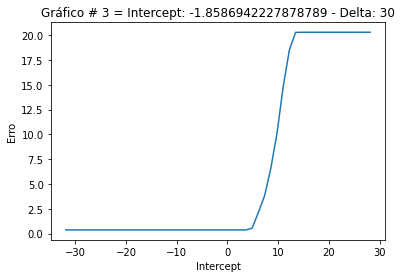

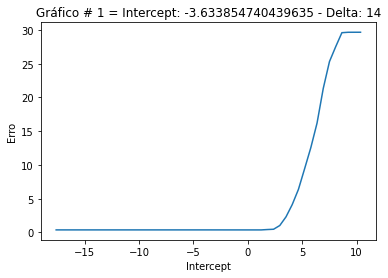

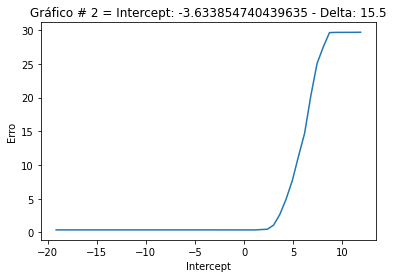

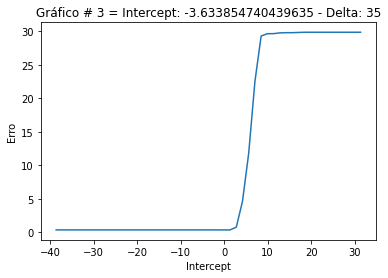

In [12]:
""" Resolvendo um problema de classificação """

import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

# Carregando os dados
# Informações sobre o dataset: https://www.kaggle.com/c/dat31-shuttle/data
# Local onde baixei: https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass.html
# Obs.: Tive que tratar os dados, pois não vieram no formato csv. Também haviam valores 'NaN'
df = pd.read_csv('/content/sample_data/shuttle.csv')


# Separando em features e target
X = df.iloc[:, 1:].values # Retira a coluna 'target'. Fica com as features de 1 a 9
y = df.iloc[:, 0].values # Pega somente a coluna 'target'


def calcular_erros_vs_intercepts(intercepts, ind_intercept, delta, coef, classes,):
    """
    Calcula cada variação do intercept e guarda num vetor, depois faz uma predição
    para cada valor e calcula o respectivo 'mean_squared_error'
    """
    # Instancia o classificador e seta os coeficientes
    clf2 = LogisticRegression(max_iter=200)
    clf2.coef_ = coef
    clf2.classes_ = classes
    clf2.intercept_ = intercepts

    # Prepara para variar o intercept
    qtd_amostras = 50
    intercepts_lin = np.linspace(intercepts[ind_intercept] - delta, 
                                 intercepts[ind_intercept] + delta, 
                                 qtd_amostras)

    # Gera o vetor para guardar os erros calculados
    erros = np.empty(intercepts_lin.shape)

    # Faz as predições variando o intercept na posição i e calcula os MSEs
    for i in range(len(intercepts_lin)):
        clf2.intercept_[ind_intercept] = intercepts_lin[i]
        ypred = clf2.predict(X)
        erros[i] = mean_squared_error(y, ypred)

    return intercepts_lin, erros
    

def gerar_graficos(modelo):
    """ Gera 3 gráficos para cada intercept """
    # Deltas para variação dos intercepts. Cada linha varia 1 intercept
    deltas = [[2, 3.5, 5], [4, 5, 10], [6, 7.5, 15], [8, 9, 20],
              [10, 11.5, 25], [12, 13, 30], [14, 15.5, 35]]
     

    # Percorre todos os intercepts e varia de acordo com a matriz de deltas
    for i in range(len(modelo.intercept_)):
        # Guarda o intercept para retorná-lo ao array de intercepts após o
        # cálculo do erro
        aux = modelo.intercept_[i]
        
        for j in range(len(deltas[i])):
            intercepts, erros = calcular_erros_vs_intercepts(modelo.intercept_, 
                                i, deltas[i][j], modelo.coef_, modelo.classes_)

            titulo = f"Gráfico # {j+1} = Intercept: {aux} - Delta: {deltas[i][j]}"
            plt.title(titulo)
            plt.ylabel("Erro")
            plt.xlabel("Intercept")
            plt.plot(intercepts, erros)
            plt.show()

            # Restaura o valor do intercept para a próxima iteração
            modelo.intercept_[i] = aux


# Treinando e predizendo para obter o valor do Intercept
clf = LogisticRegression(max_iter=200)
clf.fit(X, y)
ypred = clf.predict(X)


print('\nIntercept.....:', clf.intercept_)
print('Erro inicial..:', mean_squared_error(y, ypred))
print('Classes.......:', clf.classes_, '\n')

gerar_graficos(clf)
